In [1]:
import matplotlib.pyplot as plt
from benchmark_on_mnist import benchmark_mnist


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
### Parameters

num_classes = 3
num_data_per_class = 1
model_path = "fine_tuning/pretrained_models/bisonai/1shot_3way_bisonai_ckpt_o15t/model.ckpt-99999"
epochs = 10
lr_range = [0.01, 0.005, 0.001, 0.0005]
num_data_test = 1000

In [3]:
loss_train, loss_test = benchmark_mnist(num_classes,
                num_data_per_class,
                model_path,
                epochs,
                lr_range,
                num_data_test)

avg_loss_train = [[sum(loss_train[lr][e])/(num_classes*num_data_per_class) for e in range(epochs)] for lr in range(len(lr_range))]
avg_loss_test = [[sum(loss_test[lr][e])/num_data_test for e in range(epochs)] for lr in range(len(lr_range))]

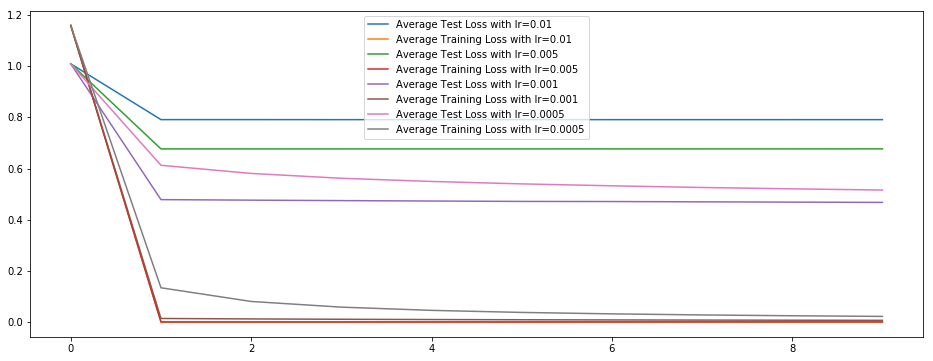

In [4]:
fig = plt.figure(figsize=(16, 6))

for i in range(len(lr_range)):
    plt.plot(range(epochs), avg_loss_test[i], label = "Average Test Loss with lr={}".format(lr_range[i]))
    plt.plot(range(epochs), avg_loss_train[i], label = "Average Training Loss with lr={}".format(lr_range[i]))

plt.legend()
plt.show()